## Imports

Python comes with a lot of features, but there are external packages we use for statistics and data visualization

In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

## Reading data

Pandas dataframes are very similar to excel files and have a lot of the same functionality. However, you can't click around in them

In [33]:
participants = pd.read_excel('data/Fake Participants.xlsx').set_index('Participant')
participants.head()

,Vaccine,Sex,Age,Prior Infection
Participant,,,,
1,Moderna,Male,40,No
2,Moderna,Female,55,No
3,Pfizer,Female,35,No
4,Moderna,Female,45,Yes
5,Pfizer,Male,30,No


In [34]:
samples = pd.read_excel('data/Fake Samples.xlsx')
samples.head()

,Participant,Days from Vaccine,AUC
0,1,48,30806.252969
1,1,104,16539.480441
2,1,132,9055.145294
3,1,160,5582.419017
4,1,188,4152.484662


### Raw AUC Data

Possible to plot, difficult to interpret

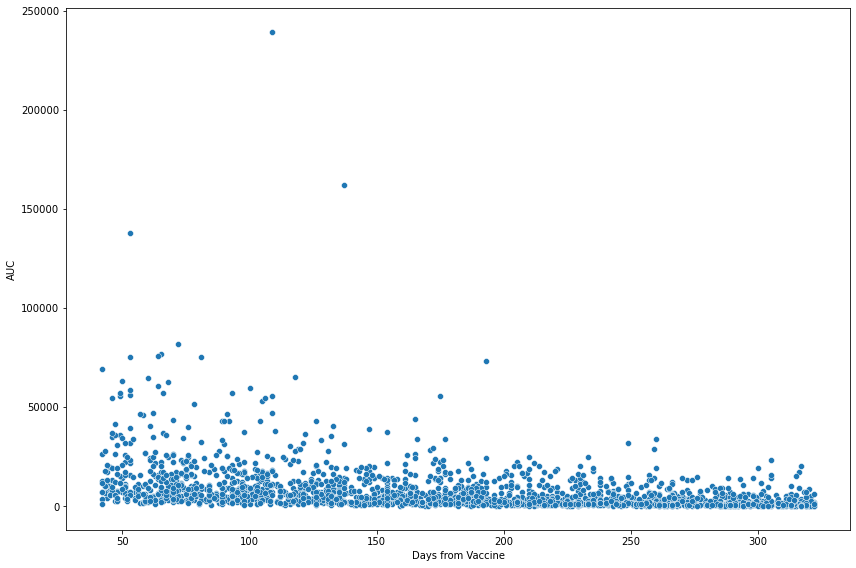

In [43]:
fig, ax = plt.subplots()

sns.scatterplot(data=samples, x='Days from Vaccine', y='AUC')

fig.set_size_inches(12,8)

plt.tight_layout()
plt.show()

### Log transforming data

Since AUC varies across multiple orders of magnitude, observing patterns is much easier after transforming data by taking the logarithm

You can do the same transformation in Excel as well, Python is not unique here

In [44]:
samples['Log2AUC'] = np.log2(samples['AUC'])

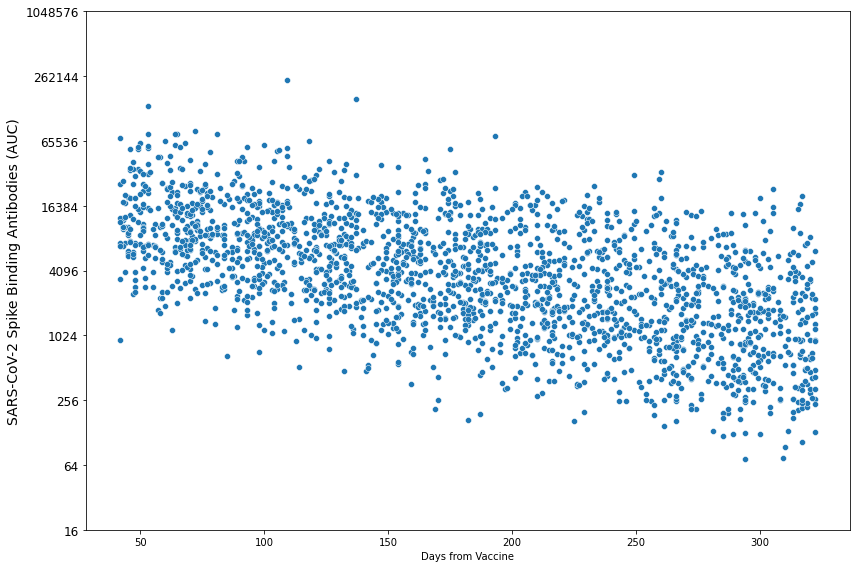

In [45]:
fig, ax = plt.subplots()

sns.scatterplot(data=samples, x='Days from Vaccine', y='Log2AUC')

plt.yticks(ax.get_yticks(), np.exp2(ax.get_yticks()).astype(int), fontsize=12)
ax.set_ylabel('SARS-CoV-2 Spike Binding Antibodies (AUC)', fontsize=14)
fig.set_size_inches(12,8)

plt.tight_layout()
plt.show()

## Combine data from different sources

In [46]:
samples_annot = samples.join(participants, on='Participant', how='left')
samples_annot.head()

,Participant,Days from Vaccine,AUC,Log2AUC,Vaccine,Sex,Age,Prior Infection
0,1,48,30806.252969,14.910936,Moderna,Male,40,No
1,1,104,16539.480441,14.013626,Moderna,Male,40,No
2,1,132,9055.145294,13.144522,Moderna,Male,40,No
3,1,160,5582.419017,12.446675,Moderna,Male,40,No
4,1,188,4152.484662,12.019759,Moderna,Male,40,No


## Plots and analysis relying on participant information

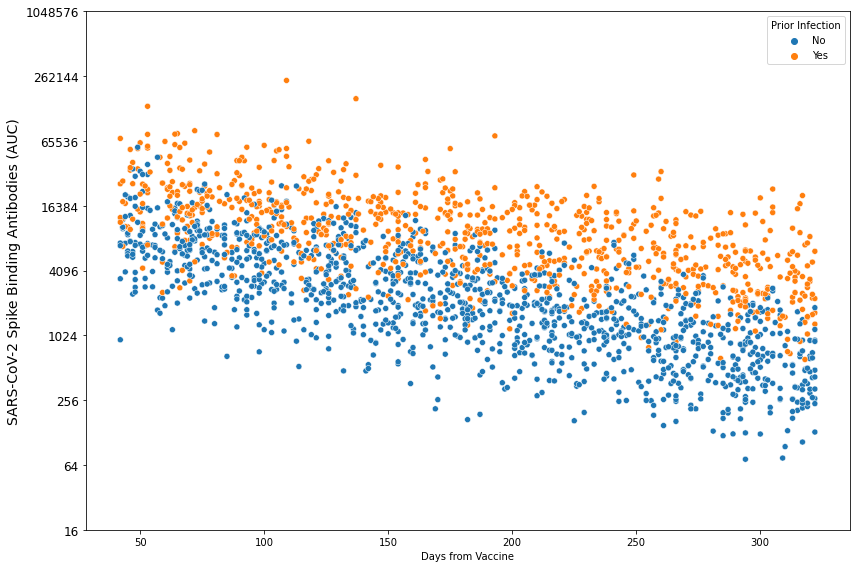

In [47]:
fig, ax = plt.subplots()
sns.scatterplot(data=samples_annot, x='Days from Vaccine', y='Log2AUC', hue='Prior Infection', hue_order=['No', 'Yes'])

plt.yticks(ax.get_yticks(), np.exp2(ax.get_yticks()).astype(int), fontsize=12)
ax.set_ylabel('SARS-CoV-2 Spike Binding Antibodies (AUC)', fontsize=14)
fig.set_size_inches(12,8)

plt.tight_layout()
plt.show()

#### Colors
I like almost all of these colors, and there are many more options

In [48]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

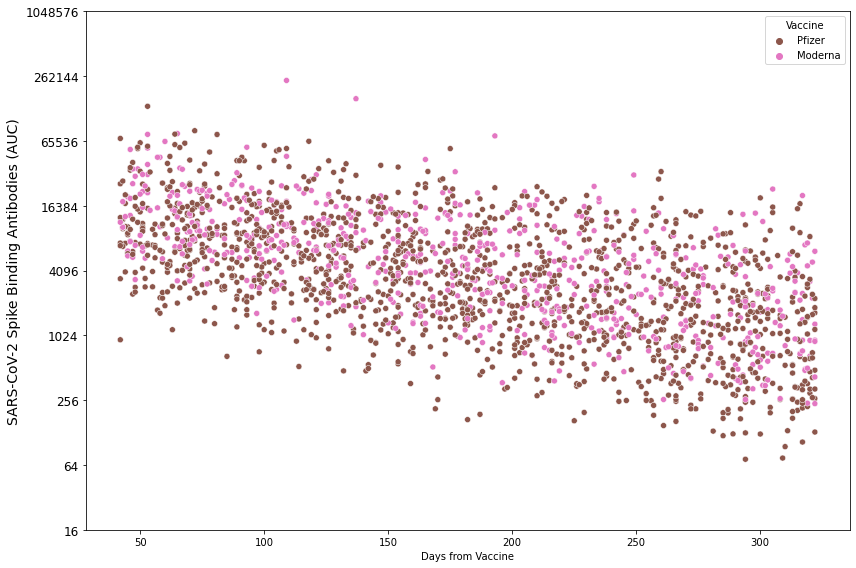

In [49]:
pal = [sns.color_palette()[5], sns.color_palette()[6]]

fig, ax = plt.subplots()

sns.scatterplot(data=samples_annot, x='Days from Vaccine', y='Log2AUC', hue='Vaccine', hue_order=['Pfizer', 'Moderna'], palette=pal)

plt.yticks(ax.get_yticks(), np.exp2(ax.get_yticks()).astype(int), fontsize=12)
ax.set_ylabel('SARS-CoV-2 Spike Binding Antibodies (AUC)', fontsize=14)
fig.set_size_inches(12,8)

plt.tight_layout()
plt.show()

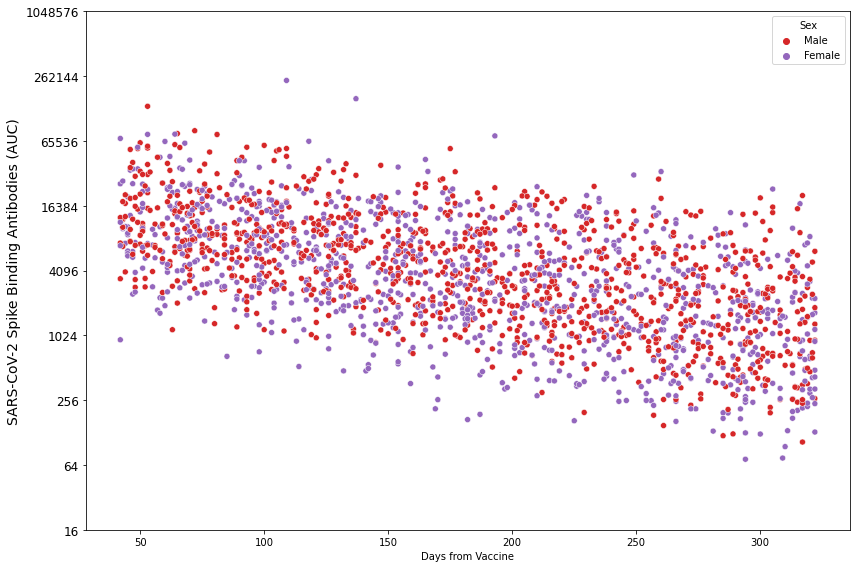

In [50]:
pal = [sns.color_palette()[3], sns.color_palette()[4]]

fig, ax = plt.subplots()

sns.scatterplot(data=samples_annot, x='Days from Vaccine', y='Log2AUC', hue='Sex', hue_order=['Male', 'Female'], palette=pal)

plt.yticks(ax.get_yticks(), np.exp2(ax.get_yticks()).astype(int), fontsize=12)
ax.set_ylabel('SARS-CoV-2 Spike Binding Antibodies (AUC)', fontsize=14)
fig.set_size_inches(12,8)

plt.tight_layout()
plt.show()

### Visual inspection

Looking at your data is good, but there's only so much I can tell here. It's pretty clear that SARS-CoV-2 infection affects post-vaccine antibody level, but I don't see a clear difference based on vaccine type or sex. Here, statistics will be your friend

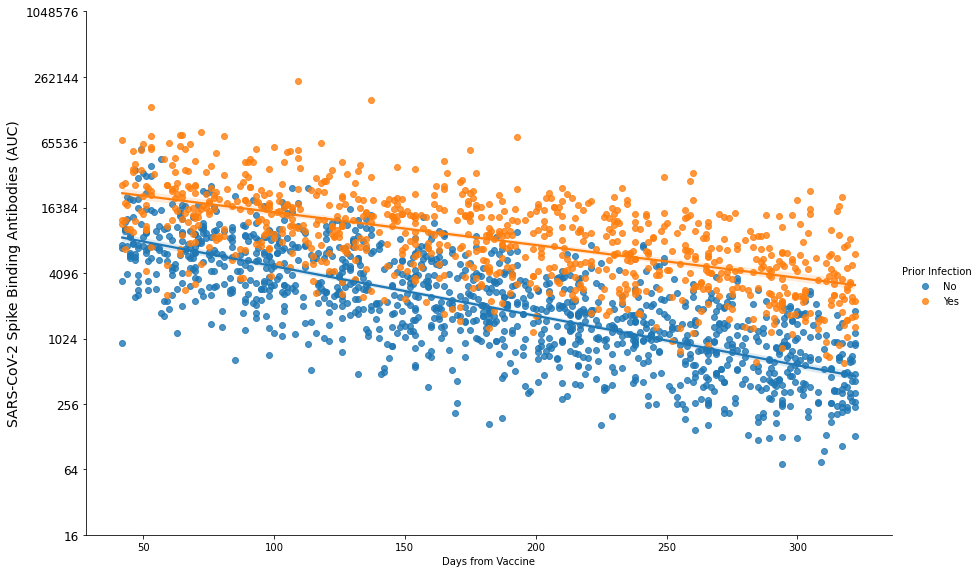

In [59]:
g = sns.lmplot(data=samples_annot, x='Days from Vaccine', y='Log2AUC', hue='Prior Infection', hue_order=['No', 'Yes'], height=8, aspect=1.5, facet_kws={'legend_out': True})

plt.yticks(g.ax.get_yticks(), np.exp2(g.ax.get_yticks()).astype(int), fontsize=12)
g.ax.set_ylabel('SARS-CoV-2 Spike Binding Antibodies (AUC)', fontsize=14)

plt.show()

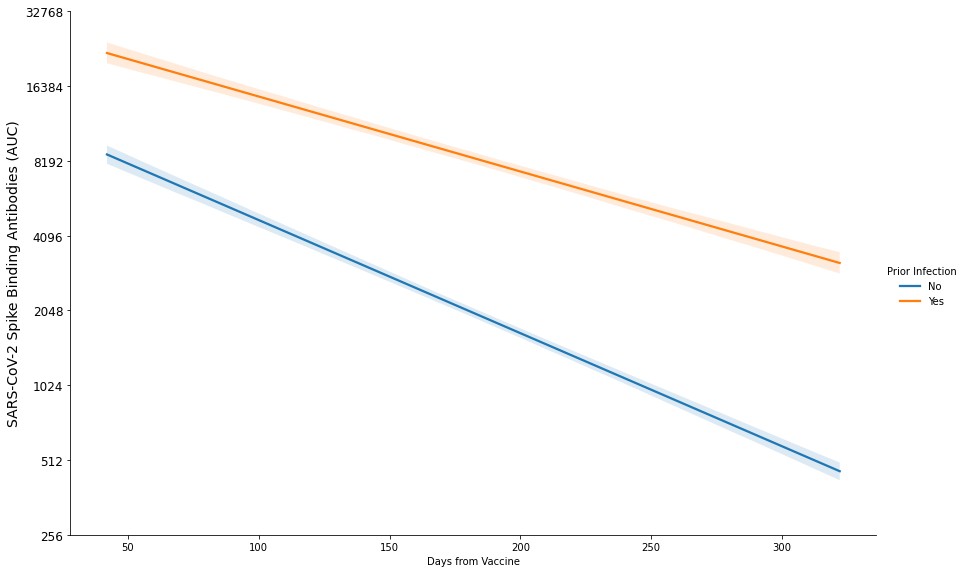

In [60]:
g = sns.lmplot(data=samples_annot, x='Days from Vaccine', y='Log2AUC', hue='Prior Infection', hue_order=['No', 'Yes'], height=8, aspect=1.5, facet_kws={'legend_out': True}, scatter=False)

plt.yticks(g.ax.get_yticks(), np.exp2(g.ax.get_yticks()).astype(int), fontsize=12)
g.ax.set_ylabel('SARS-CoV-2 Spike Binding Antibodies (AUC)', fontsize=14)

plt.show()

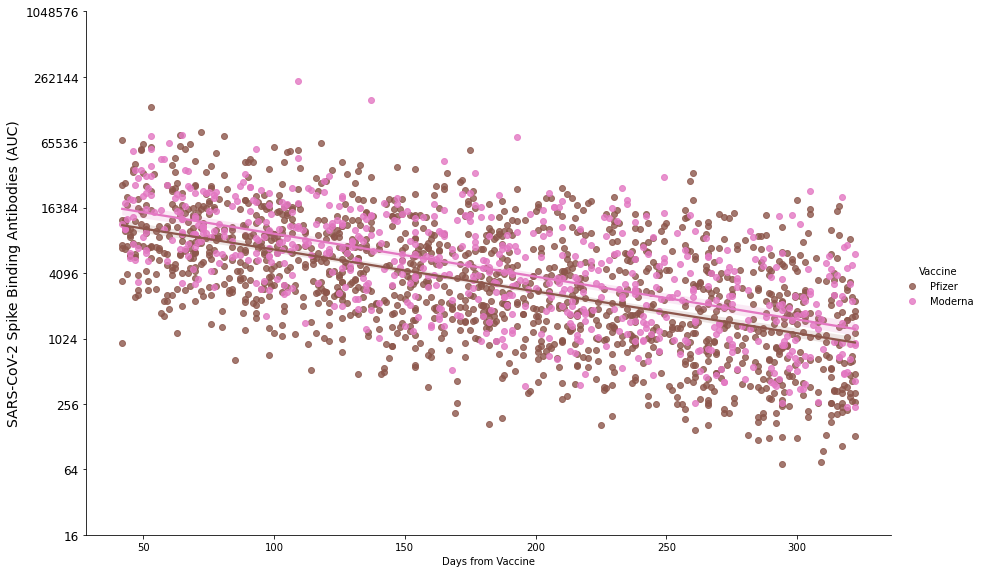

In [61]:
pal = [sns.color_palette()[5], sns.color_palette()[6]]

g = sns.lmplot(data=samples_annot, x='Days from Vaccine', y='Log2AUC', hue='Vaccine', hue_order=['Pfizer', 'Moderna'], palette=pal, height=8, aspect=1.5, facet_kws={'legend_out': True})

plt.yticks(g.ax.get_yticks(), np.exp2(g.ax.get_yticks()).astype(int), fontsize=12)
g.ax.set_ylabel('SARS-CoV-2 Spike Binding Antibodies (AUC)', fontsize=14)

plt.show()

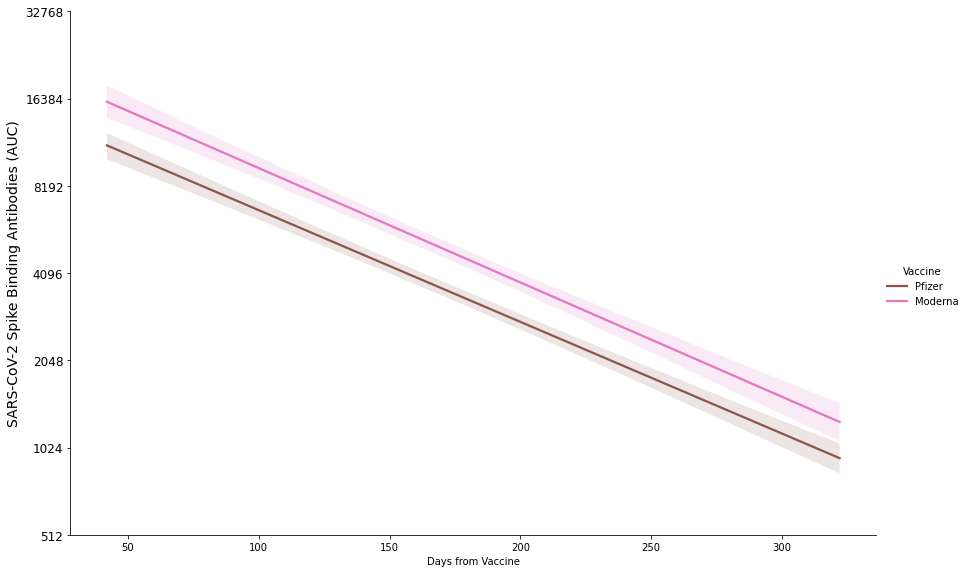

In [62]:
pal = [sns.color_palette()[5], sns.color_palette()[6]]

g = sns.lmplot(data=samples_annot, x='Days from Vaccine', y='Log2AUC', hue='Vaccine', hue_order=['Pfizer', 'Moderna'], palette=pal, height=8, aspect=1.5, facet_kws={'legend_out': True}, scatter=False)

plt.yticks(g.ax.get_yticks(), np.exp2(g.ax.get_yticks()).astype(int), fontsize=12)
g.ax.set_ylabel('SARS-CoV-2 Spike Binding Antibodies (AUC)', fontsize=14)

plt.show()

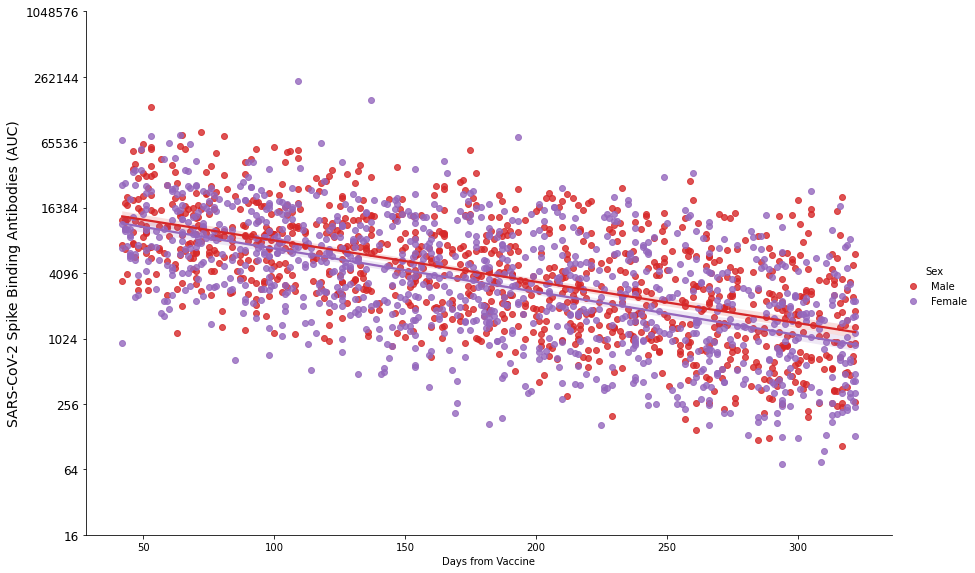

In [63]:
pal = [sns.color_palette()[3], sns.color_palette()[4]]

g = sns.lmplot(data=samples_annot, x='Days from Vaccine', y='Log2AUC', hue='Sex', hue_order=['Male', 'Female'], palette=pal, height=8, aspect=1.5, facet_kws={'legend_out': True})

plt.yticks(g.ax.get_yticks(), np.exp2(g.ax.get_yticks()).astype(int), fontsize=12)
g.ax.set_ylabel('SARS-CoV-2 Spike Binding Antibodies (AUC)', fontsize=14)

plt.show()

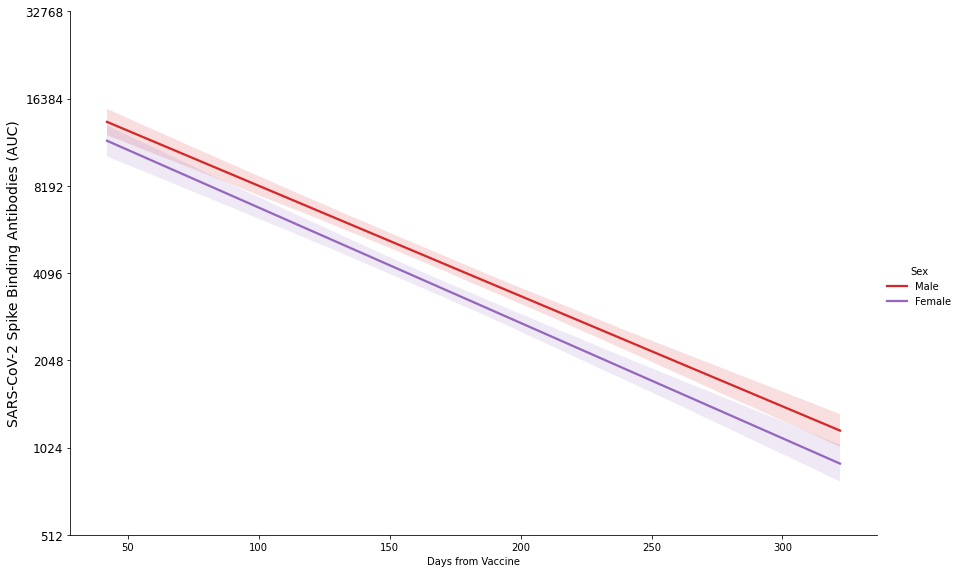

In [64]:
pal = [sns.color_palette()[3], sns.color_palette()[4]]

g = sns.lmplot(data=samples_annot, x='Days from Vaccine', y='Log2AUC', hue='Sex', hue_order=['Male', 'Female'], palette=pal, height=8, aspect=1.5, facet_kws={'legend_out': True}, scatter=False)

plt.yticks(g.ax.get_yticks(), np.exp2(g.ax.get_yticks()).astype(int), fontsize=12)
g.ax.set_ylabel('SARS-CoV-2 Spike Binding Antibodies (AUC)', fontsize=14)

plt.show()

### Enough with the pictures

Really you'd like to move to numbers at some point. It looks like all of these factors might make a difference, so it's worth looking at all 3 together.

We can start with the simplest model: linear regression!

In [86]:
samples_annot['Sex_Male'] = samples_annot['Sex'].apply(lambda val: int(val == 'Male'))
samples_annot['Infection_Yes'] = samples_annot['Prior Infection'].apply(lambda val: int(val == 'Yes'))
samples_annot['Vaccine_Moderna'] = samples_annot['Vaccine'].apply(lambda val: int(val == 'Moderna'))
samples_annot['Days'] = samples_annot['Days from Vaccine']

In [87]:
Y = samples_annot['Log2AUC']
X = sm.add_constant(samples_annot.loc[:, ['Days from Vaccine', 'Sex_Male', 'Infection_Yes', 'Vaccine_Moderna']])
model = sm.OLS(Y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Log2AUC   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     1017.
Date:                Wed, 15 Jun 2022   Prob (F-statistic):               0.00
Time:                        14:32:24   Log-Likelihood:                -3146.5
No. Observations:                2110   AIC:                             6303.
Df Residuals:                    2105   BIC:                             6331.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                12.9900      0.067    192.775      0.000      12.858      13.122
Days from Vaccine    -0.0130      0.000    -45.252      0.000      -0.014      -0.012
Sex_Male              0.3200      0.047      6.821      0.000       0.228       0.412
Infection_Yes         2.0998      0.048     44.017      0.000       2.006       2.193
Vaccine_Moderna       0.5702      0.050     11.319      0.000       0.471       0.669
==============================================================================
Omnibus:                        2.567   Durbin-Watson:                   0.656
Prob(Omnibus):                  0.277   Jarque-Bera (JB):                2.435
Skew:                          -0.034   Prob(JB):                        0.296
Kurtosis:                       2.848   Cond. No.                         634.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Assumptions

So far, we've been implicitly assuming these factors don't interact. One hypothesis we might test is that antibody levels in participants with and without prior infection decay at different rates. We might test that by fitting two different models, or by adding an interaction term

#### Fitting two models

In [90]:
model_df_pos = samples_annot[samples_annot['Infection_Yes'] == 1]

Y = model_df_pos['Log2AUC']
X = sm.add_constant(model_df_pos.loc[:, ['Days from Vaccine', 'Sex_Male', 'Vaccine_Moderna']])
model = sm.OLS(Y, X)
results = model.fit()
print("Seropositives:")
print(results.summary())
print()

model_df_neg = samples_annot[samples_annot['Infection_Yes'] == 0]

Y = model_df_neg['Log2AUC']
X = sm.add_constant(model_df_neg.loc[:, ['Days from Vaccine', 'Sex_Male', 'Vaccine_Moderna']])
model = sm.OLS(Y, X)
results = model.fit()
print("Seronegatives:")
print(results.summary())
print()

Seropositives:
                            OLS Regression Results                            
Dep. Variable:                Log2AUC   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.373
Method:                 Least Squares   F-statistic:                     172.2
Date:                Wed, 15 Jun 2022   Prob (F-statistic):           2.07e-87
Time:                        14:38:43   Log-Likelihood:                -1286.4
No. Observations:                 863   AIC:                             2581.
Df Residuals:                     859   BIC:                             2600.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                14

#### Adding an Interaction Term

In [91]:
samples_annot['Infection_Days'] = samples_annot['Infection_Yes'] * samples_annot['Days']

In [92]:
Y = samples_annot['Log2AUC']
X = sm.add_constant(samples_annot.loc[:, ['Days from Vaccine', 'Sex_Male', 'Infection_Yes', 'Vaccine_Moderna', 'Infection_Days']])
model = sm.OLS(Y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Log2AUC   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     860.0
Date:                Wed, 15 Jun 2022   Prob (F-statistic):               0.00
Time:                        14:38:50   Log-Likelihood:                -3107.3
No. Observations:                2110   AIC:                             6227.
Df Residuals:                    2104   BIC:                             6260.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                13.3744      0.079    169.415      0.000      13.220      13.529
Days from Vaccine    -0.0152      0.000    -41.046      0.000      -0.016      -0.014
Sex_Male              0.3235      0.046      7.023      0.000       0.233       0.414
Infection_Yes         1.1601      0.115     10.067      0.000       0.934       1.386
Vaccine_Moderna       0.5701      0.049     11.527      0.000       0.473       0.667
Infection_Days        0.0051      0.001      8.925      0.000       0.004       0.006
==============================================================================
Omnibus:                        2.824   Durbin-Watson:                   0.655
Prob(Omnibus):                  0.244   Jarque-Bera (JB):                2.612
Skew:                          -0.026   Prob(JB):                        0.271
Kurtosis:                       2.836   Cond. No.                     1.22e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.22e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Slopes differ

Either way, the decay rates seem to differ substantially and significantly. One other aspect we haven't accounted for here is the differing sampling frequencies and timings:

In [114]:
visit_counts = samples_annot.groupby('Participant').count()
first_visits = samples_annot.groupby('Participant').min()
last_visits = samples_annot.groupby('Participant').max()
samples_annot['Number of Visits'] = samples_annot['Participant'].apply(lambda val: visit_counts.loc[val, 'Days'])
samples_annot['First Visit'] = samples_annot['Participant'].apply(lambda val: first_visits.loc[val, 'Days'])
samples_annot['Last Visit'] = samples_annot['Participant'].apply(lambda val: last_visits.loc[val, 'Days'])
samples_annot.drop_duplicates(subset=['Participant']).set_index('Participant').head(15).iloc[:, -3:]

,Number of Visits,First Visit,Last Visit
Participant,,,
1,8,48,300
2,7,65,317
3,9,48,300
4,6,68,320
5,8,52,304
6,9,77,301
7,8,103,299
8,5,63,315
9,5,95,319


These differences can result in bias, if, for example, participants with lower antibody levels come in more frequently

### Linear Mixed Effects Models

We can account for differing numbers of samples with a linear mixed effects model, which has a concept of a "group" of samples coming from the same participant

In [113]:
model = smf.mixedlm("Log2AUC ~ Days + Sex_Male + Vaccine_Moderna + Infection_Yes + Infection_Days", samples_annot, groups=samples_annot["Participant"])
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
           Mixed Linear Model Regression Results
===========================================================
Model:             MixedLM  Dependent Variable:  Log2AUC   
No. Observations:  2110     Method:              REML      
No. Groups:        300      Scale:               0.2518    
Min. group size:   5        Log-Likelihood:      -2039.2983
Max. group size:   9        Converged:           Yes       
Mean group size:   7.0                                     
-----------------------------------------------------------
                Coef.  Std.Err.    z    P>|z| [0.025 0.975]
-----------------------------------------------------------
Intercept       13.368    0.106 126.506 0.000 13.161 13.576
Days            -0.015    0.000 -84.484 0.000 -0.016 -0.015
Sex_Male         0.310    0.110   2.811 0.005  0.094  0.527
Vaccine_Moderna  0.543    0.118   4.607 0.000  0.312  0.774
Infection_Yes    1.141    0.124   9.234 0.000  0.899  1.383
Infection_Days   0.005    0.000  19.388 0.000  0.005  0.006
Group Var        0.874    0.161                            
===========================================================

"""

## Summary

This is just a demonstration of a few features! Specifically, there are some advantages to using python (in a Jupyter notebook):
- In-line formatted notes and descriptions of datasets and code
- Equal ease in pulling data from distinct Excel workbooks
- Joining data from different notebooks (based on a unique identifier like participant ID or sample ID)
- Quick visualizations with attractive defaults
- Complex statistical analysis and metrics available in the same program